Homework set 3 question 1

In [4]:
%config InlineBackend.figure_format='retina'
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 20)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from keras import utils
import math

# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

In [10]:
from sklearn.datasets import load_digits


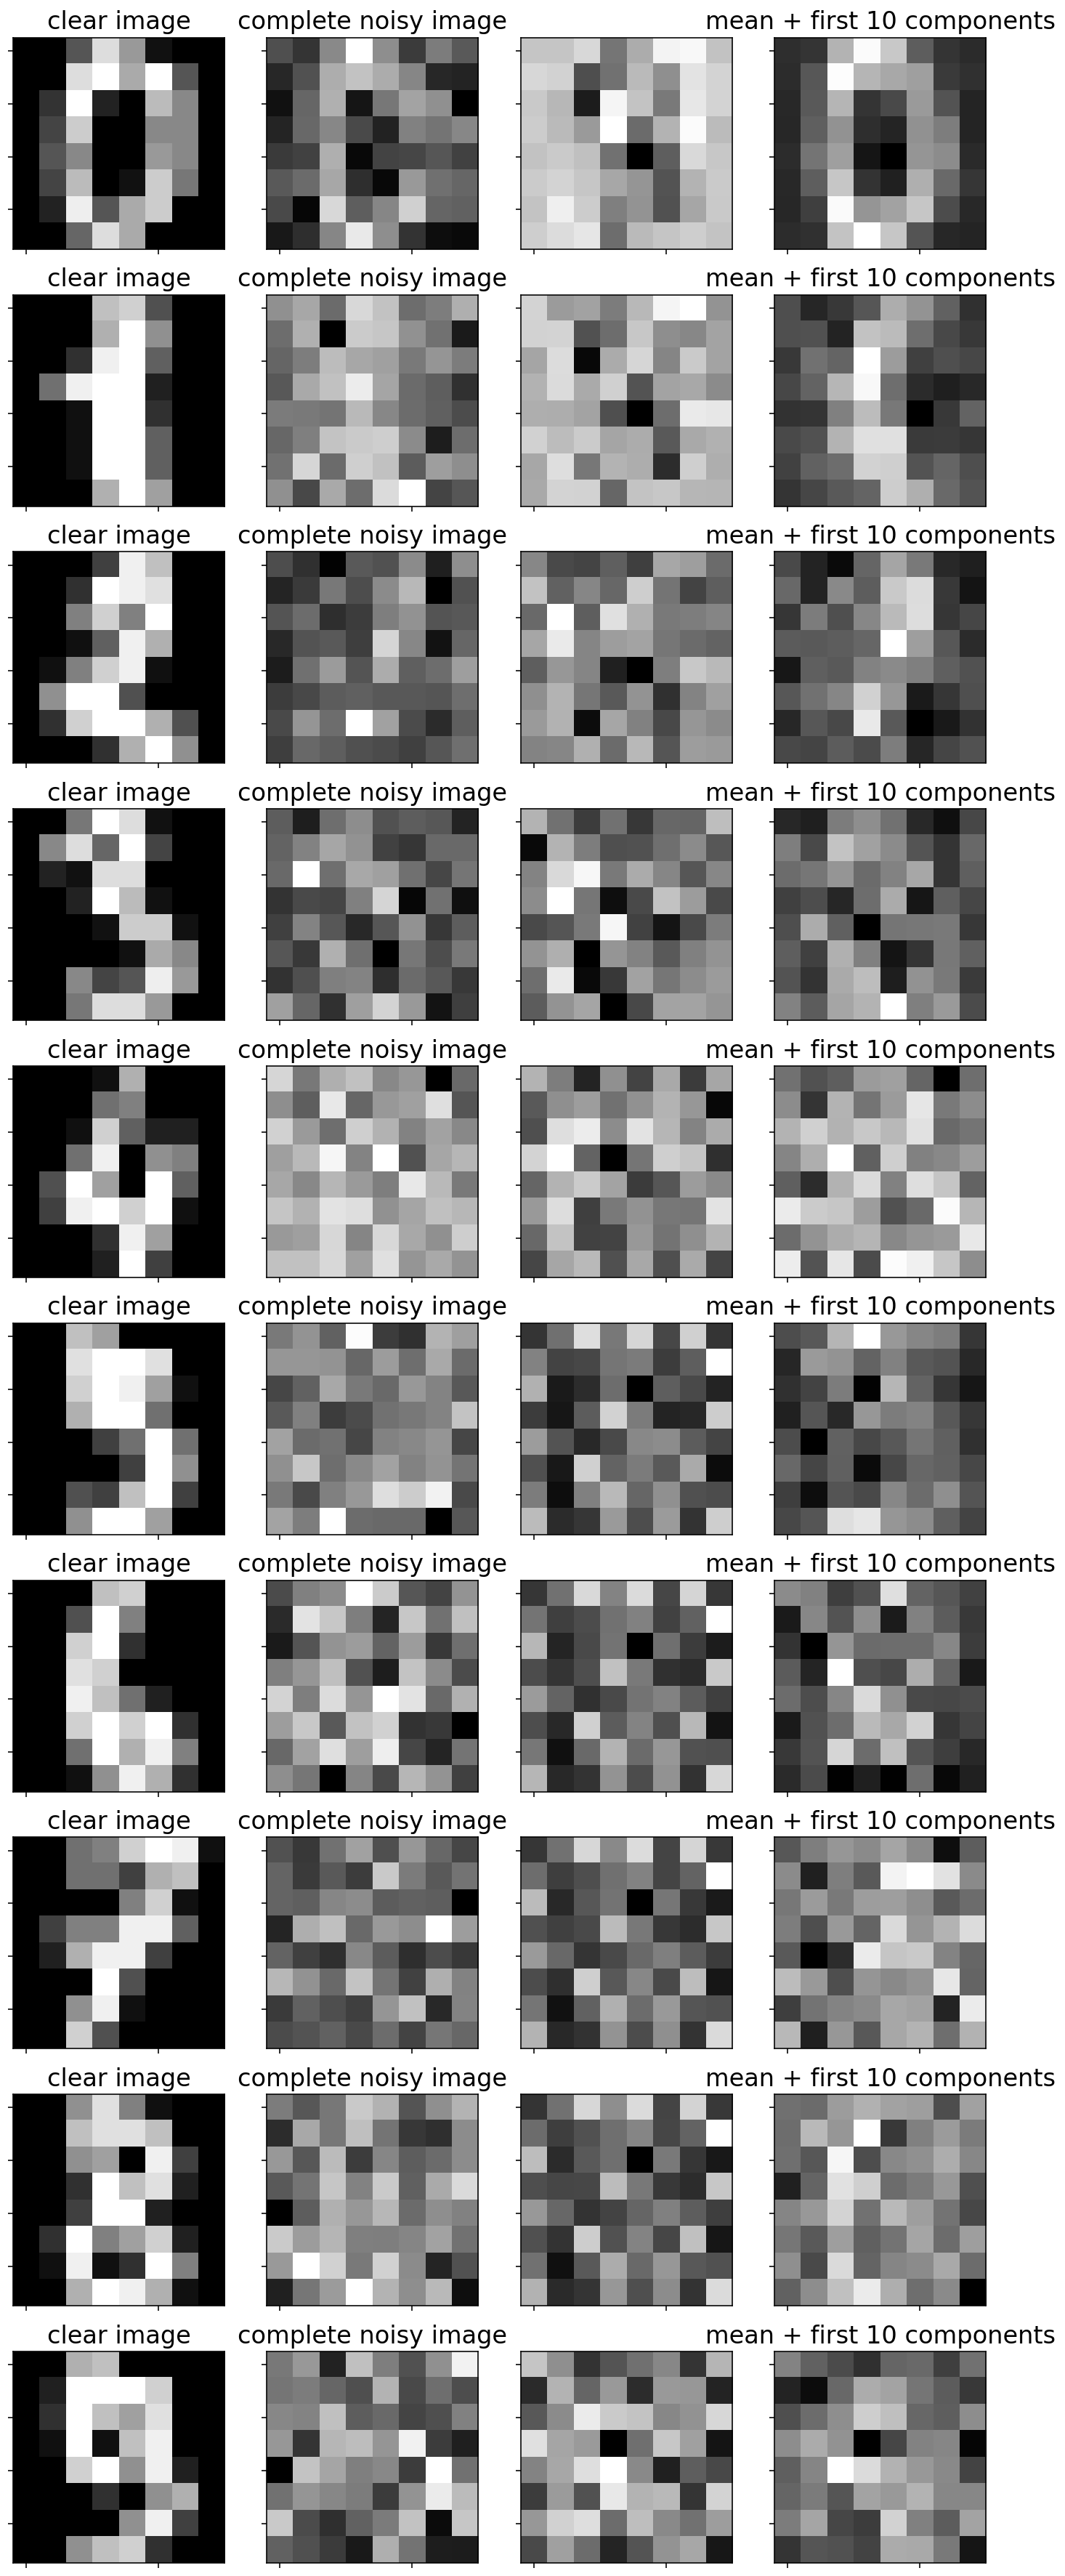

In [12]:
from sklearn.decomposition import PCA
from ipywidgets import interact
import copy

def show_digit(n_components=6):
    digits = load_digits()
    fig, axs = plt.subplots(10, 4, figsize=(12, 8*4))
    digitos = copy.deepcopy(digits)
    for n in range(10):
        
        digito = digitos.data[n]
        
        ax = axs[n,0]
        ax.set_title('clear image')
        ax.imshow(digito.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        np.random.seed(42)
        noisy = np.random.normal(digits.data, 4)
        digits.data = noisy
        
        digit = digits.data[n]
        
        ax = axs[n,1]
        ax.set_title('complete noisy image')
        ax.imshow(digit.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        pca = PCA(n_components)
        pca.fit(digits.data)

        # components
        ax = axs[n,2]
        if n_components == 1:
            template = pca.mean_.reshape(8,8)
        else:
            template = pca.components_[n_components-1].reshape(8,8)
        template = pca.components_[n_components-1].reshape(8,8)
        ax.imshow(template, cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        ax = axs[n,3]
        ax.imshow(pca.inverse_transform(pca.transform(digit.reshape(1, -1))).reshape(8,8), 
                  cmap='gray')
        ax.set_title('mean + first %i components' % (n_components))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()
    
interact(show_digit, n_components=(1,63));


it can be observed that PCA is hepling to reduce effect of noise to some extend however the image will never be as clean as original. Yet given the state of noisy image it is impresive that something can be seen from it after noise removal; the effect is better for some digits than for other. Differenct numbers of components are tested but is the quality of the result is hard to judge. For example, the for digit 0 and 1 the noise removal is very good if we keep 6 to 10 components yt number 5 cannot be seen in the plot without noise